<a href="https://colab.research.google.com/github/lucarenz1997/recommender_systems/blob/main/data-prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploratory Data Analysis (EDA) and Data Preparation
**Authors** : Rafaella and Luca

# Setup

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data

In [21]:
# Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Recommender/train.csv")
# Suppress all warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA) and Data Prep

In [22]:
#Dataset Shape
print(data.shape)

#Missing Values
print(data.isnull().sum()) # no NAs

#Converting to datatypes
data['ts_listen'] = pd.to_datetime(data['ts_listen'], unit='s')
data['artist_id'] = data['artist_id'].astype('category')
data['media_id'] = data['media_id'].astype('category')
data['genre_id'] = data['genre_id'].astype('category')
data['user_gender'] = data['user_gender'].astype('bool')
data['is_listened'] = data['is_listened'].astype('bool')
data['album_id'] = data['album_id'].astype('category')
data['context_type'] = data['context_type'].astype('category')
data['platform_name'] = data['platform_name'].astype('category')
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y%m%d', errors='coerce')
data['listen_type'] = data['listen_type'].astype('category')
data['platform_family'] = data['platform_family'].astype('category')
data['user_id'] = data['user_id'].astype('category')

print(data.dtypes)

#Drop invalid release date
data = data.dropna(subset=['release_date'])

(7558834, 15)
genre_id           0
ts_listen          0
media_id           0
album_id           0
context_type       0
release_date       0
platform_name      0
platform_family    0
media_duration     0
listen_type        0
user_gender        0
user_id            0
artist_id          0
user_age           0
is_listened        0
dtype: int64
genre_id                 category
ts_listen          datetime64[ns]
media_id                 category
album_id                 category
context_type             category
release_date       datetime64[ns]
platform_name            category
platform_family          category
media_duration              int64
listen_type              category
user_gender                  bool
user_id                  category
artist_id                category
user_age                    int64
is_listened                  bool
dtype: object


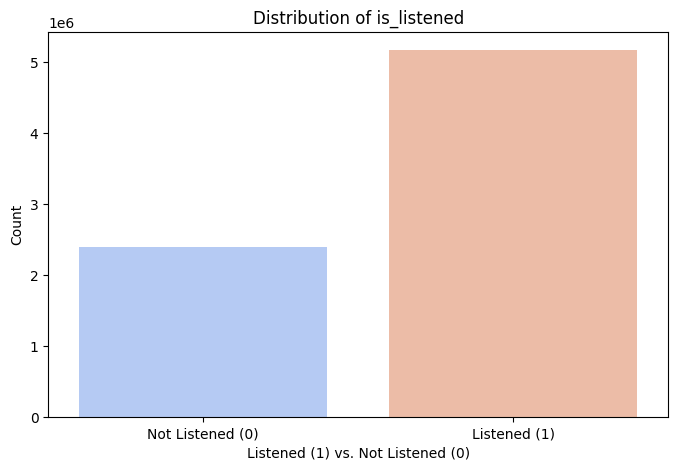

In [23]:
#Target Variable Distribution
# Plot the distribution of 'is_listened'
plt.figure(figsize=(8, 5))
sns.countplot(x=data['is_listened'], palette="coolwarm")
plt.xlabel("Listened (1) vs. Not Listened (0)")
plt.ylabel("Count")
plt.title("Distribution of is_listened")
plt.xticks([0, 1], ["Not Listened (0)", "Listened (1)"])
plt.show()

                           ts_listen                   release_date  \
count                        7558817                        7558817   
mean   2016-11-13 04:15:35.787582720  2011-11-21 04:03:28.365938432   
min              1970-01-01 00:00:01            1900-01-01 00:00:00   
25%              2016-11-06 19:27:50            2009-12-31 00:00:00   
50%              2016-11-13 17:12:01            2014-10-31 00:00:00   
75%              2016-11-21 15:24:54            2016-06-07 00:00:00   
max              2016-12-01 23:44:05            2017-03-13 00:00:00   
std                              NaN                            NaN   

       media_duration      user_age  
count    7.558817e+06  7.558817e+06  
mean     2.311528e+02  2.431278e+01  
min      0.000000e+00  1.800000e+01  
25%      1.960000e+02  2.100000e+01  
50%      2.220000e+02  2.500000e+01  
75%      2.540000e+02  2.800000e+01  
max      6.553500e+04  3.000000e+01  
std      7.999471e+01  3.767799e+00  
             Colum

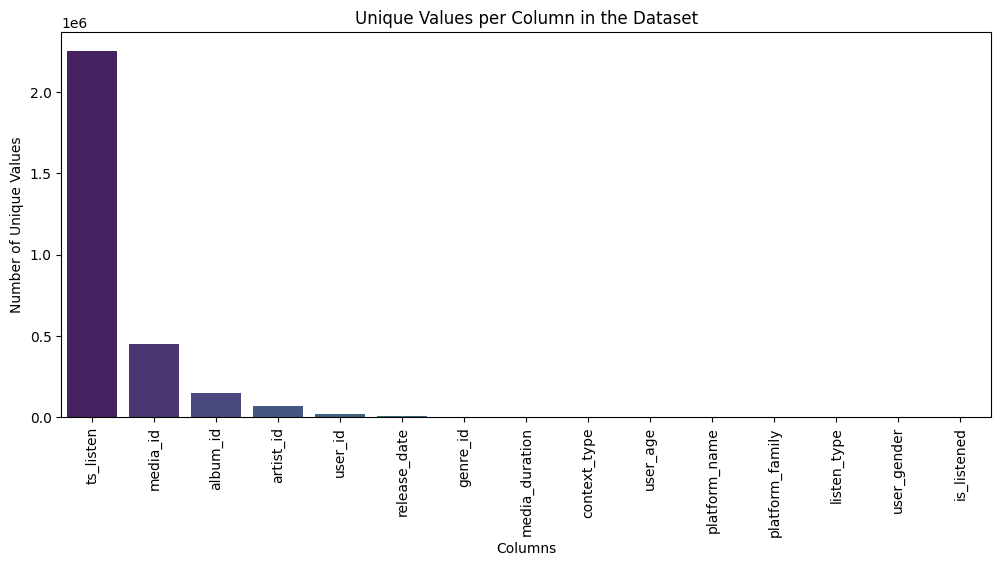

Number of duplicate rows in the dataset: 0
Dataset size after removing duplicates: 7558817 rows


In [24]:
print(data.describe())

# Compute the number of unique values per column
unique_values = data.nunique()

# Convert to DataFrame for better visualization
unique_values_df = pd.DataFrame(unique_values, columns=["Unique Values"]).reset_index()
unique_values_df.columns = ["Column", "Unique Values"]

# Print the unique values per column
print(unique_values_df)

# Optional: Visualizing unique values per column
plt.figure(figsize=(12, 5))
sns.barplot(x="Column", y="Unique Values", data=unique_values_df.sort_values(by="Unique Values", ascending=False), palette="viridis")
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Values per Column in the Dataset")
plt.show()

# Check for duplicate rows in the dataset
duplicate_rows = data.duplicated().sum()

# Display the result
print(f"Number of duplicate rows in the dataset: {duplicate_rows}")

# Remove duplicate rows from the dataset
data = data.drop_duplicates()

# Display the number of rows after removing duplicates
print(f"Dataset size after removing duplicates: {data.shape[0]} rows")

## Analyzing the Distribution of User and Song IDs

media_id
132434634    20148
133165774    17652
132123604    16289
132123626    15131
132123630    14347
129632340    13076
131576046    12709
132614858    12394
134748108    12257
133661814    11663
Name: count, dtype: int64
user_id
0    6317
1    6240
2    6211
3    5581
4    5426
5    5400
6    5398
7    5237
8    5185
9    4989
Name: count, dtype: int64


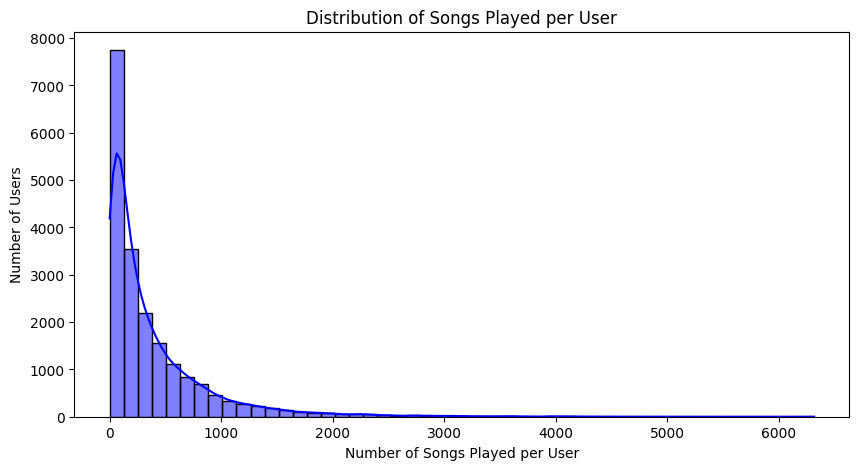

Number of unique user_id: 19918
Number of unique media_id: 452965
Average number of unique media_id per user_id: 199.59
Average number of unique user_id per media_id: 8.78


In [25]:
# --- Most Listened Songs ---
top_songs = data['media_id'].value_counts().head(10)
print(top_songs)

# --- Top Users (Power Users) ---
top_users = data['user_id'].value_counts().head(10)
print(top_users)

# --- Histogram: Number of Songs Played per User ---
plt.figure(figsize=(10, 5))
sns.histplot(data["user_id"].value_counts(), bins=50, kde=True, color="blue")
plt.xlabel("Number of Songs Played per User")
plt.ylabel("Number of Users")
plt.title("Distribution of Songs Played per User")
plt.show()

# Number of unique user_id and media_id
num_unique_users = data['user_id'].nunique()
num_unique_media = data['media_id'].nunique()

# Average number of unique media per user
mean_media_per_user = data.groupby('user_id')['media_id'].nunique().mean()
# Average number of unique users per media
mean_users_per_media = data.groupby('media_id')['user_id'].nunique().mean()

# Print results
print(f"Number of unique user_id: {num_unique_users}")
print(f"Number of unique media_id: {num_unique_media}")
print(f"Average number of unique media_id per user_id: {mean_media_per_user:.2f}")
print(f"Average number of unique user_id per media_id: {mean_users_per_media:.2f}")

## Investigating Feature Correlations

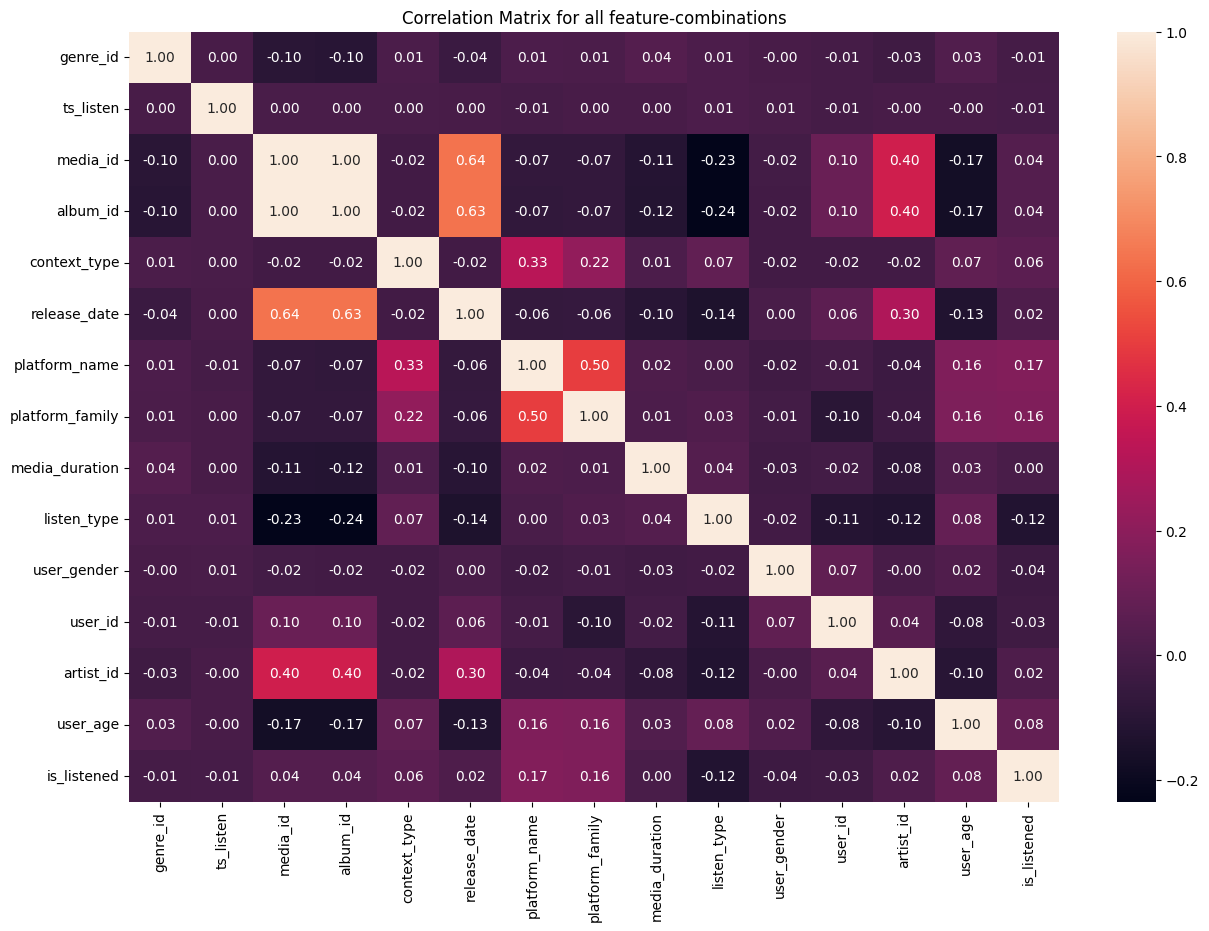

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix for all feature-combinations')
plt.show()

## Outlier Removal

In [27]:
# Function to remove rare records based on a frequency threshold
def remove_rare_records(df, col, threshold):
    initial_count = len(df)
    counts = df.groupby(col).size()
    filtered = counts[counts > threshold].index
    df_filtered = df[df[col].isin(filtered)]

    # Calculate removed rows and percentage
    removed_count = initial_count - len(df_filtered)
    removed_percentage = round((removed_count / initial_count) * 100, 2)

    print(f"Removed {removed_count} rows from `{col}` with fewer than {threshold} occurrences.")
    print(f"This corresponds to {removed_percentage}% of the dataset.\n")

    return df_filtered

# Function to remove outliers using the IQR method
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    print(f"Removing outliers from {col} with lower boundary of {lower_bound} and upper boundary of {upper_bound}")
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#Removing rare user_id and media_id first
data_clean = remove_rare_records(data, 'user_id', data.groupby('user_id').size().quantile(0.25))  # Removing inactive users
data_clean = remove_rare_records(data_clean, 'media_id', data.groupby('media_id').size().quantile(0.25))  # Removing rarely played songs

#Removing rare records from other categorical variables
data_clean = remove_rare_records(data_clean, 'genre_id', data.groupby('genre_id').size().quantile(0.25))  # Removing rare genres

#Final dataset size comparison after rare records removal
initial_rows = len(data)
final_rows = len(data_clean)
removed_rows = initial_rows - final_rows
removed_percentage = round((removed_rows / initial_rows) * 100, 2)

print(f"Total rows removed: {removed_rows} ({removed_percentage}% of the dataset).")
print(f"Final dataset size: {final_rows} rows (from {initial_rows} original rows).")

Removed 149124 rows from `user_id` with fewer than 66.0 occurrences.
This corresponds to 1.97% of the dataset.

Removed 205253 rows from `media_id` with fewer than 1.0 occurrences.
This corresponds to 2.72% of the dataset.

Removed 1412 rows from `genre_id` with fewer than 3.0 occurrences.
This corresponds to 0.02% of the dataset.

Total rows removed: 1412 (0.02% of the dataset).
Final dataset size: 7557405 rows (from 7558817 original rows).


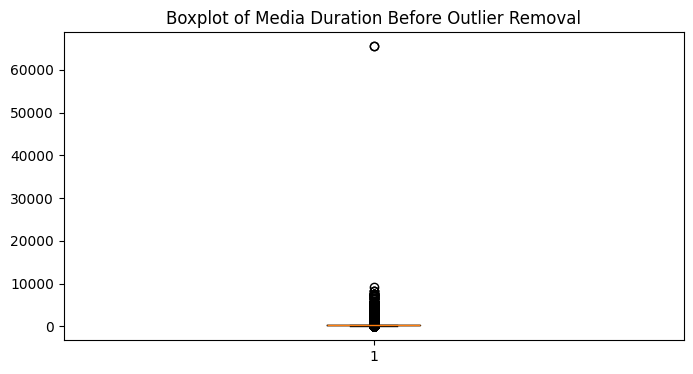

Removing outliers from media_duration with lower boundary of 109.0 and upper boundary of 341.0
Removing outliers from media_duration with lower boundary of 114.0 and upper boundary of 330.0


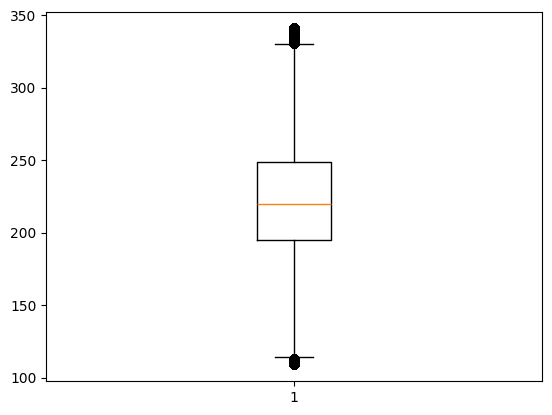

In [28]:
#Removing outliers from media_duration
plt.figure(figsize=(8, 4))
plt.boxplot(data_clean['media_duration'])
plt.title("Boxplot of Media Duration Before Outlier Removal")
plt.show()

data_clean = remove_outliers(data_clean, 'media_duration')


# Remove outliers using the IQR method
def remove_outliers(df, col):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower_bound = q_1 - 1.5 * IQR
    upper_bound = q_3 + 1.5 * IQR
    print(f"Removing outliers from {col} with lower boundary of {lower_bound} and upper boundary of {upper_bound}")
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

plt.boxplot(data_clean['media_duration']) # quite a few songs that seem to last for hours or even days. Let's remove them.

data_clean = remove_outliers(data_clean,'media_duration')

When analyzing ts_listen, it was shown that most of the timestamps were after 2016 while less than one thousand songs were listened before 2016. Therefore, it has been decided to remove outliers.

ts_listen
1970-12-31        235
1973-12-31          0
1976-12-31          0
1979-12-31          0
1982-12-31        379
1985-12-31          0
1988-12-31          0
1991-12-31          0
1994-12-31          0
1997-12-31          1
2000-12-31          0
2003-12-31          2
2006-12-31          0
2009-12-31        108
2012-12-31         12
2015-12-31         48
2018-12-31    7087289
Freq: 3YE-DEC, dtype: int64
Removing outliers from ts_listen with lower boundary of 2016-10-15 13:02:22.374999808 and upper boundary of 2016-12-13 21:40:53.375000320


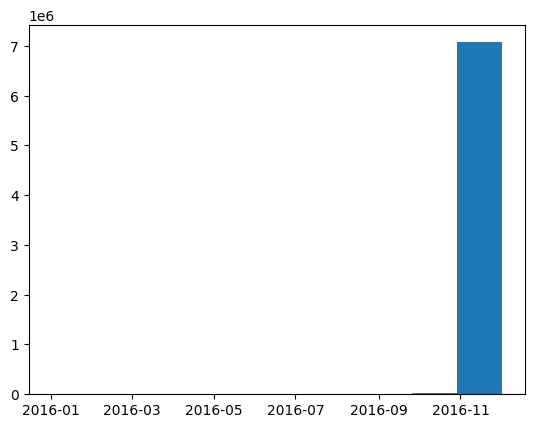

In [29]:
# Grouping by 3-year intervals to see the approximate counts
grouped_data = data_clean.groupby(pd.Grouper(key='ts_listen', freq='3YE')).size()
print(grouped_data) # We can start at 2016

len(data_clean[data_clean['ts_listen'] < pd.Timestamp('2015-12-31')])

tmp = data_clean[data_clean['ts_listen'] > pd.Timestamp('2015-12-31')]
plt.hist(tmp['ts_listen'])

# outlier removal
data_clean = remove_outliers(data_clean,'ts_listen')

(array([5.20000e+01, 1.20000e+02, 3.67000e+02, 7.48000e+02, 9.24000e+02,
        9.87000e+02, 1.37200e+03, 1.27700e+03, 1.76700e+03, 2.01000e+03,
        2.69500e+03, 4.86600e+03, 5.15700e+03, 3.61620e+04, 3.21467e+05,
        3.82243e+05, 3.98379e+05, 3.82242e+05, 2.75001e+05, 2.79429e+05,
        3.15934e+05, 3.30998e+05, 3.62541e+05, 2.97539e+05, 2.16900e+05,
        2.73924e+05, 2.83344e+05, 3.10147e+05, 2.94113e+05, 2.52636e+05,
        1.98205e+05, 2.49252e+05, 2.59684e+05, 2.50189e+05, 2.33090e+05,
        2.02967e+05, 1.84185e+05, 1.95857e+05, 1.86268e+05, 9.03560e+04]),
 array([17089.58644676, 17090.77150926, 17091.95657176, 17093.14163426,
        17094.32669676, 17095.51175926, 17096.69682176, 17097.88188426,
        17099.06694676, 17100.25200926, 17101.43707176, 17102.62213426,
        17103.80719676, 17104.99225926, 17106.17732176, 17107.36238426,
        17108.54744676, 17109.73250926, 17110.91757176, 17112.10263426,
        17113.28769676, 17114.47275926, 17115.65782176

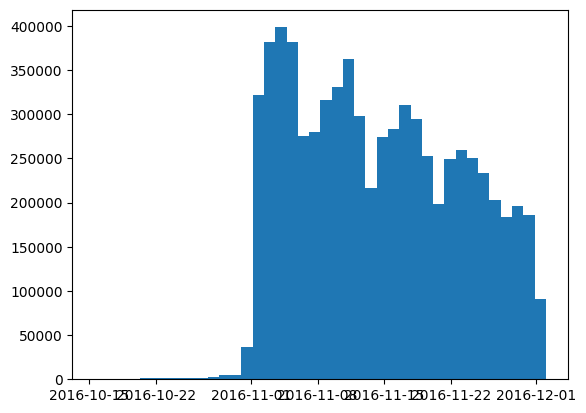

In [30]:
# After outlier removal
plt.hist(data_clean['ts_listen'], bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x782f4ae46890>,
 'caps': [<matplotlib.lines.Line2D at 0x782f4ae47bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x782f4ae46150>],
 'medians': [<matplotlib.lines.Line2D at 0x782f4ae50f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x782f4ae518d0>],
 'means': []}

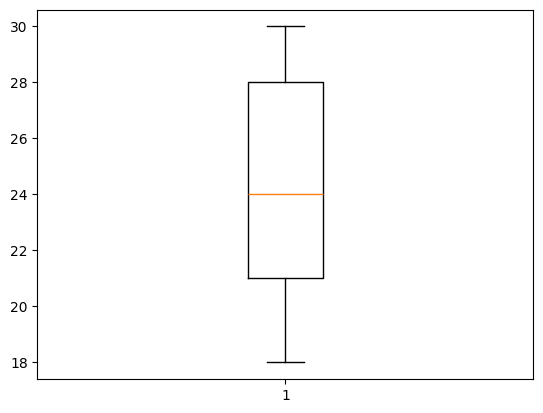

In [31]:
plt.boxplot(data_clean['user_age']) # no outliers here. Ages between 18 and 30

For many features such as genre_id, artist_id, etc. there are several thousand unique values. Therefore, to not stretch our matrices unnecessarily and remove complexity, it has been decided to use minimum thresholds for specific categories which will reduce dimensions.

## Sampling
Due to performance issues, it was not possible to perform complex calculations. therefore, it has been decided to only use a subset of the given data.
In this case, we want to keep the distribution in respect to the usage of users.

In [ ]:
sampled_data = data_clean.sample(frac=0.05, random_state=42).reset_index(drop=True)
print(len(sampled_data))

341901


## Feature Engineering

In [ ]:
sampled_data['hour'] = sampled_data['ts_listen'].dt.hour
sampled_data['day'] = sampled_data['ts_listen'].dt.dayofweek

sampled_data['is_weekend'] = sampled_data['day'].isin([5, 6])

# Create time of day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'MORNING'
    elif 12 <= hour < 18:
        return 'AFTERNOON'
    elif 18 <= hour < 21:
        return 'EVENING'
    else:
        return 'NIGHT'

sampled_data['time_of_day'] = sampled_data['hour'].apply(get_time_of_day)
sampled_data['last_listen'] = sampled_data.groupby('user_id')['ts_listen'].diff().dt.total_seconds().abs().fillna(0)

# Release-related
sampled_data['days_since_release'] = (sampled_data['ts_listen'] - sampled_data['release_date']).dt.days

In [ ]:
# Feature Engineering
sampled_data["genre_popularity"] = sampled_data.groupby('genre_id')['genre_id'].transform('count')
sampled_data["media_popularity"] = sampled_data.groupby('media_id')['media_id'].transform('count')
sampled_data["artist_popularity"] = sampled_data.groupby('artist_id')['artist_id'].transform('count')
sampled_data["album_popularity"] = sampled_data.groupby('album_id')['album_id'].transform('count')
sampled_data['songs_listened'] = sampled_data.groupby('user_id')['media_id'].transform('count')

# Not possible due to limited resources

# user_top_genre = sampled_data.groupby(['user_id', 'genre_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
# sampled_data['user_top_genre'] = sampled_data['user_id'].map(user_top_genre)

# user_top_artist = sampled_data.groupby(['user_id', 'artist_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
# sampled_data['user_top_artist'] = sampled_data['user_id'].map(user_top_artist)

# user_top_song = sampled_data.groupby(['user_id', 'media_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
# sampled_data['user_top_song'] = sampled_data['user_id'].map(user_top_song)

In [ ]:
# Time-Based Popularity (Last 7 Days)
max_timestamp = sampled_data['ts_listen'].max()  # Latest timestamp
seven_days_ago = max_timestamp - pd.Timedelta(days=7)  # 7-day window

# Filter data to include only the last 7 days
df_last_7_days = sampled_data[sampled_data['ts_listen'] >= seven_days_ago]

# Compute popularity in the last 7 days
song_popularity_7d = df_last_7_days['media_id'].value_counts().rename_axis('media_id').reset_index(name='song_popularity_7d')
artist_popularity_7d = df_last_7_days['artist_id'].value_counts().rename_axis('artist_id').reset_index(name='artist_popularity_7d')
album_popularity_7d = df_last_7_days['album_id'].value_counts().rename_axis('album_id').reset_index(name='album_popularity_7d')

# Merge the 7-day popularity back into the main dataset
sampled_data = sampled_data.merge(song_popularity_7d, on='media_id', how='left')
sampled_data = sampled_data.merge(artist_popularity_7d, on='artist_id', how='left')
sampled_data = sampled_data.merge(album_popularity_7d, on='album_id', how='left')

# Fill missing values (songs not played in the last 7 days → popularity = 0)
sampled_data[['song_popularity_7d', 'artist_popularity_7d', 'album_popularity_7d']] = sampled_data[
    ['song_popularity_7d', 'artist_popularity_7d', 'album_popularity_7d']
].fillna(0)

# Examining Temporal Patterns

In [ ]:
# --- Listening Behavior Across Different Hours of the Day ---
plt.figure(figsize=(10, 5))
sns.countplot(x=data['hour'], palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Plays")
plt.title("Listening Behavior Across Different Hours of the Day")
plt.xticks(range(0, 24))
plt.show()

# --- Differences Between Weekdays and Weekends ---
plt.figure(figsize=(6, 5))
sns.countplot(x=data['is_weekend'], palette="viridis")
plt.xlabel("Weekday (0) vs. Weekend (1)")
plt.ylabel("Number of Plays")
plt.title("Differences Between Weekdays and Weekends")
plt.xticks([0, 1], ["Weekday", "Weekend"])
plt.show()

# --- Seasonal Trends (e.g., increased listening during holidays) ---
data['month'] = data['ts_listen'].dt.month  # Extract month from timestamp
plt.figure(figsize=(10, 5))
sns.countplot(x=data['month'], palette="magma")
plt.xlabel("Month")
plt.ylabel("Number of Plays")
plt.title("Seasonal Trends in Music Listening")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


## Encoding

Due to high dimensionalities in features such as genre_id, media_id, etc, It has been decided to encode them.
One-Hot-Encoding was the initial approach but soon in the process, it has been realized that resources were not enough which have led to the following solution:

| Feature Type | Encoding Method | Reason |
|-------------|----------------|--------|
| **User (`user_id`)** | **Label Encoding** | Efficient for collaborative filtering models (ALS, NCF, LightFM) |
| **Item (`media_id`, `album_id`, `artist_id`)** | **Label Encoding** | Keeps item embeddings meaningful without excessive memory usage |
| **Context Features (`platform_name`, `platform_family`, `listen_type`, `context_type`)** | **Frequency Encoding** | Keeps distributions without adding many dimensions |
| **Genre (`genre_id`)** | **Label Encoding** | Captures user preferences good |
| **Time Features (`time_of_day`, `hour`, `is_weekend`, `days_since_release`)** | **Keep as is** | These are numerical and don’t need encoding |
| **Popularity Features (`song_popularity_7d`, `artist_popularity_7d`, `album_popularity_7d`)** | **Keep as is** | Useful for ranking and trend-based recommendations |

- Use Label Encoding for IDs (users, media, artists, albums)
- Use Frequency Encoding for categorical context features  
- Use Target Encoding for genres
- Keep numerical features unchanged



In [ ]:
sampled_data.dtypes

,0
genre_id,category
ts_listen,datetime64[ns]
media_id,category
album_id,category
context_type,category
release_date,datetime64[ns]
platform_name,category
platform_family,category
media_duration,int64
listen_type,category


In [ ]:
# categorical_cols = ['genre_id', 'media_id', 'album_id', 'context_type',
#                     'platform_name', 'platform_family', 'listen_type',
#                     'user_id', 'artist_id', 'time_of_day']

# # One-Hot Encoding the categorical columns - not possible due to memory usage.
# # sampled_data_encoded = pd.get_dummies(sampled_data, columns=categorical_cols, drop_first=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Copy the dataset to avoid modifying the original
# encoded_data = sampled_data.copy()

# # Label Encoding for IDs (User, Media, Artist, Album, Genre)
# label_cols = ['user_id', 'media_id', 'album_id', 'artist_id', 'genre_id']

# for col in label_cols:
#     le = LabelEncoder()
#    # encoded_data[col] = le.fit_transform(encoded_data[col])

# # Frequency Encoding for Context Features
# freq_cols = ['platform_name', 'platform_family', 'listen_type', 'context_type']

# for col in freq_cols:
#     freq_map = encoded_data[col].value_counts(normalize=True)  # Normalize for proportion
#    # encoded_data[col] = encoded_data[col].map(freq_map)

## Normalization

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # List of numerical features to normalize
# numerical_cols = [
#     'media_duration', 'user_age', 'hour', 'day', 'days_since_release',
#     'genre_popularity', 'media_popularity', 'artist_popularity', 'album_popularity',
#     'songs_listened', 'song_popularity_7d', 'artist_popularity_7d', 'album_popularity_7d',
#     'last_listen'  # Time difference in seconds
# ]

# # Initialize the scaler
# scaler = MinMaxScaler()

# # Apply normalization
# #encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])

In [ ]:
# encoded_data['is_listened'] = encoded_data['is_listened'].astype(int)
# encoded_data['user_gender'] = encoded_data['user_gender'].astype(int)
# encoded_data['is_weekend'] = encoded_data['is_weekend'].astype(int)

# Splitting
As we are working with time series data, it has been decided to split on a specific date where the 80% will be used to train the model and 20% to test it.

In [ ]:
# encoded_data = encoded_data.sort_values(by='ts_listen')

# # Find the date corresponding to the 80% percentile
# split_date = encoded_data['ts_listen'].quantile(0.8)

# # Train-test split based on calculated date
# train = encoded_data[encoded_data['ts_listen'] < split_date]
# test = encoded_data[encoded_data['ts_listen'] >= split_date]

# # Print dataset sizes
# print(f"Split Date: {split_date}")
# print(f"{len(train)} interactions for TRAINING ({round(len(train) / len(encoded_data) * 100, 2)}%)")
# print(f"{len(test)} interactions for TESTING ({round(len(test) / len(encoded_data) * 100, 2)}%)")

Split Date: 2016-11-23 10:38:22
273520 interactions for TRAINING (80.0%)
68381 interactions for TESTING (20.0%)


# Saving processed Datasets

In [ ]:
sampled_data.to_csv('/content/drive/My Drive/Recommender/preprocessed.csv', index=False)
# train.to_csv('/content/drive/My Drive/Recommender/preprocessed_train.csv', index=False)
# test.to_csv('/content/drive/My Drive/Recommender/preprocessed_test.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
